In [30]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [31]:
np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()


In [32]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
print(raw_data_copy['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
data = raw_data_copy['data']
target = raw_data_copy['target']

In [35]:
data[:5]


array([[5.10, 3.50, 1.40, 0.20],
       [4.90, 3.00, 1.40, 0.20],
       [4.70, 3.20, 1.30, 0.20],
       [4.60, 3.10, 1.50, 0.20],
       [5.00, 3.60, 1.40, 0.20]])

In [36]:
target[:5]

array([0, 0, 0, 0, 0])

In [37]:
all_data = np.c_[data,target]
all_data[:5]

array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00]])

In [38]:
df = pd.DataFrame(data=all_data,columns=raw_data_copy['feature_names']+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [39]:
df.describe().apply(lambda x: round(x,2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


In [40]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

<AxesSubplot: ylabel='target'>

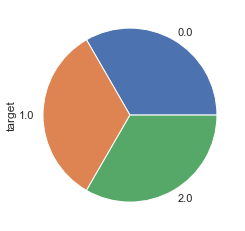

In [41]:
df.target.value_counts().plot(kind='pie')

In [42]:
data = df.copy()
target= data.pop('target')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,target,random_state=42)
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)

Test ratio: 0.25

y_train:
1.0    39
2.0    38
0.0    35
Name: target, dtype: int64

y_test:
0.0    15
2.0    12
1.0    11
Name: target, dtype: int64
